# COGS 108 - Final Project 

# Overview

# Names

- Albert Putra Purnama
- Austin Moss-Ennis
- Chandler Ennis
- Xirui He

# Group Members IDs

- A14759370
- A92007839
- A13878506
- A13825489

# Research Question

1. Compared to the Vietnam War’s influence on popular music, how did Donald Trump’s election win and campaign platform influence popular music in America?

## Background and Prior Work

&emsp;&emsp;Music has a power to express one’s perspective, when President Donald Trump was elected into office, many people and music forums were discussing how artists would be inspired by the president’s election, suggesting that countless protest songs and political anthems would arise from this time period. Despite this suggestion, the vast majority of popular music seems to be apolitical. <br>
&emsp;&emsp;Previous work has shown that although political content has occured in music lyrics, and largely on rap and hip-hop, political messages have not been common in the top-hit songs. The study also shows that the predominant topic in popular songs remains romantic relationships, however, with the changes in popular culture and lifestyle, there was increases in certain social issues, such as alcohol and drug use, partying, and wealth. <br> 
&emsp;&emsp;The study focused on the trend of content in top songs over the past four decades, identifying the prevailing themes in the top chart and how they evolve over the decades. Our project will focus on political content and how their occurences change over the past five decades. <br>

References (include links):
- [What has America been singing about?](https://journals.sagepub.com/doi/full/10.1177/0305735617748205)

# Hypothesis


The number of popular political/protest songs during the Vietnam War will be drastically higher than the number of political songs nowadays because youth participation in politics has been much lower than it was during the Vietnam War.

# Dataset(s)

**Dataset 1**
- Dataset Name: Genius
- Link to the dataset: https://www.genius.com
- Number of observations: 300,000+
- Description: This dataset is created by scraping genius for the lyrics of songs found on the Billboard Hot 100 chart. Genius is the most popular, reliable, and consistent lyric site on the internet and, in combination with its API, it enables us to effectively find song lyrics while minimizing false positives.

**Dataset 2**
- Dataset Name: Hot 100 Songs, Country Charts, and R&B/Hip-Hop Charts from 1958 to 2019
- Link to the dataset: https://www.billboard.com
- Number of observations: 372,000+
- Description: This dataset is taken by scraping the information from the Billboard chart. The Hot 100 dataset is comprised of the top 100 songs from every week since August of 1958, the Country Charts dataset is comprised of the Top 30-50 Country songs from every week since August of 1958, the R&B/Hip-Hop dataset is comprised of the top 30-50 R&B or Hip-Hop songs from every week since August of 1958, which enables us to see the popularity of songs during signficant political periods. This allows us to look back and see what people were listening to while these significant events were occuring.

# Setup
[Our dataset CSVs (too large for Github)](https://drive.google.com/drive/folders/1FFjicOlHZy_YUpEiWGN-dj0O6zWDqLDO?fbclid=IwAR2T5hpPrPBfWzvgfX3VjVDhgaJ9PiBeG9D9dMvqbVX38GagB-SMG9vagIM)
These datasets were constructed as described later, to include songs charted on Billboard with their lyrics from Genius attached.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

In [2]:
country_songs_data = pd.read_csv('Clean_Country_Data.csv') 
# Billboard Hot Country Charts since 1958
hot_songs_data = pd.read_csv('Clean_Hot_100_Chart.csv')    
# Billboard Hot 100 Charts since 1958
hip_songs_data = pd.read_csv('Clean_Hip_Hop_Data.csv')     
# Billboard Hot Hip-Hop/R&B Charts since 1958

# The next few lines get the 2 digit year values for all the songs 
# (at the end of their popularity) and add them to the dataframe as a new column
country_songs_data['year'] = country_songs_data.apply \
(lambda row: int(row['Last Week Charted'].split('/')[2]), axis=1)
hot_songs_data['year'] = hot_songs_data.apply \
(lambda row: int(row['Last Week Charted'].split('/')[2]), axis=1)
hip_songs_data['year'] = hip_songs_data.apply \
(lambda row: int(row['Last Week Charted'].split('/')[2]), axis=1)

In [3]:
# The getYear method takes is the 2-digit year value determined above and adds 
# 1900 if the year is greater than 19 (current year is 2019) or 2000 if it is less
def getYear(inYear):
    if inYear > 19:
        return inYear + 1900
    else:
        return inYear + 2000
country_songs_data['year'] = country_songs_data.apply \
(lambda row: getYear(row['year']), axis=1)
hot_songs_data['year'] = hot_songs_data.apply \
(lambda row: getYear(row['year']), axis=1)
hip_songs_data['year'] = hip_songs_data.apply \
(lambda row: getYear(row['year']), axis=1)

In [4]:
# make sure that the data is large enough
assert len(country_songs_data) > 1000, "Country data not large enough"
assert len(hot_songs_data) > 1000, "Hot 100 data not large enough"
assert len(hip_songs_data) > 1000, "Hip Hop data not large enough"

# visually check the if the data is parsed correctly
display(country_songs_data.head())
display(hot_songs_data.head())
display(hip_songs_data.head())

,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,3 Of Hearts,Love Is Enough,4/23/01,6/11/01,"\n\nWe don't need the world outside, we've got...",43,8,2001
1,4 Runner,Cain's Blood,4/3/95,6/5/95,\n\nCHORUS\nHalf of my blood is Cain's blood\n...,26,10,1995
2,A Thousand Horses,(This Ain't No) Drunk Dial,9/7/15,1/18/16,"\n\n[Verse 1]\nGirl, don't hang up\nI called o...",30,20,2016
3,A Thousand Horses,Smoke,1/19/15,7/6/15,\n\nShe comes rolling right off the tip of my ...,5,25,2015
4,Aaron Lewis,Endless Summer,6/25/12,9/10/12,"\n\n[Verse 1]\nIn the mornin' on a Saturday, I...",39,12,2012


,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,10 Years,Wasteland,3/27/06,4/3/06,"\n\n[Intro]\nChange my attempt, good intention...",94,2,2006
1,"10,000 Maniacs",Because The Night,11/1/93,5/16/94,"\n\n[Verse 1]\nTake me now, baby, here as I am...",11,29,1994
2,"10,000 Maniacs",Candy Everybody Wants,3/1/93,5/3/93,"\n\n[Intro]\nHey, hey, give 'em what they want...",67,10,1993
3,"10,000 Maniacs",Few And Far Between,8/16/93,8/16/93,"\n\nTimes are far between, and few I bet, when...",95,1,1993
4,"10,000 Maniacs",Like The Weather,5/2/88,6/20/88,\n\n[Verse 1]\nThe color of the sky as far as ...,68,8,1988


,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,100 Proof Aged in Soul,Somebody's Been Sleeping,8/24/70,11/23/70,\n\nFe Fi Fo Fum\nI can feel the presence of s...,6,14,1970
1,112,Come See Me,11/4/96,2/24/97,"\n\n1- Baby, come see me, come see me\nI wanna...",15,17,1997
2,112,Cupid,2/24/97,9/22/97,\n\n[Intro]\nEverybody put your hands together...,2,31,1997
3,112,Dance With Me,8/6/01,12/3/01,\n\nI see you looking at me\nI can tell by you...,20,18,2001
4,112,It's Over Now,11/27/00,5/28/01,\n\nWhat is this?\nNumbers in your pocket\nI r...,1,27,2001


**Explanations on the song data** <br>

| Column name | Description |
|-------------|-------------|
| Artist | The artist, singer, or creator of the song |
| Song | The title of the song |
| Date | The date the song got released |
| Current Rank | The rank of this song on the billboard during the release |
| Last Weeks Position | The rank of this song on the billboard last week |
| Weeks on Chart | The number of weeks the song is in the billboard top 100 |
| Peak Position | The highest position of the song ever achieved in the chart |
| Lyrics | The lyrics of the song charted |
| year | The year the song was relevant (for our analysis) |

This marks the end of input data. By this point, all inputs should have been loaded<br>
 into notebook's memory. Next thing we have to do is define some constants. <br>


In [5]:
# Declare constants
CONST_THRESHOLD = 4 
# Threshold for number of terms required before a song is considered political
# We declared it as four because that seemed like the minimum number of easily 
# identifiable political words to show up in the songs we could think of that 
# we knew to be political.

# Data retrieval

The following is the code that we used to get the data from [billboard](https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics) and [genius](https://genius.com/)

> Please note that the following code is not the complete version of the code. Please refer to the github repo [here](https://github.com/albertputrapurnama/FinalProject108) for the complete python script used for actual dataset retrieval.

We will guide you briefly on how it works

```python
    # filename: DataWrangler_toCSV.py
    from datetime import date, datetime, timedelta
    import csv
    import inquirer
    from bs4 import BeautifulSoup
    import requests
    import time
    import urllib2
    import json
    import re
    import unicodedata

    lyric_dict = dict()
    nan = 0

    charts = {
        'Hot 100': ["https://www.billboard.com/charts/hot-100/", 1958, 8, 4],
        'Hip-Hop/R&B Songs': ["https://www.billboard.com/charts/r-b-hip-hop-songs/", 1958, 10, 20],
        'Country Songs': ["https://www.billboard.com/charts/country-songs/", 1958, 10, 20]
        }
```

*The above code is all about defining our constants and importing libraries.*

---
```python
    
```

```python
    # filename: DataWrangler_toCSV.py
    def info(s, dt):
        artist = s.get("data-artist").encode('ascii', 'ignore').decode('ascii')
        song = s.get("data-title").encode('ascii', 'ignore').decode('ascii')
        rank = s.get("data-rank")
        lyrics = get_lyrics(song, artist).encode('ascii', 'ignore').decode('ascii')
        if s.find(class_="chart-list-item__last-week") is None:
            last = '0'
        else:
            last = s.find(class_="chart-list-item__last-week").contents[0]
        if s.find(class_="chart-list-item__weeks-at-one") is None:
            peak = '0'
        else:
            peak = s.find(class_="chart-list-item__weeks-at-one").contents[0]
        if s.find(class_="chart-list-item__weeks-on-chart") is None:
            weeks = '0'
        else:
            weeks = s.find(class_="chart-list-item__weeks-on-chart").contents[0]
        return [artist, song, dt.isoformat(), rank, last, peak, weeks, lyrics]
```

`info` function is a helper function used to scrape the data we want from the page passed into it

`info` function takes in 2 params:
1. **s** — which is a soup page. soup page is a page given by BeautifulSoup, more documentation on BeautifulSoup [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
2. **dt** — the date of the chart page passed in.

`info` returns an array of scraped data in the desired format for further analysis

```python
    def scrape_site(writer, url, chart_date):
        global nan
        start_time = time.time()
        new_url = url + chart_date.isoformat()
        req = requests.get(new_url)
        soup = BeautifulSoup(req.text, "html.parser")
        songs = soup.find_all(class_="chart-list-item")
        hundred_list = [info(x, chart_date) for x in songs]
        print("Time taken: " + str(time.time() - start_time))
        print("NaNs = " + str(nan))
        writer.writerows(hundred_list)
```
`scrape` site will take use `info` function to scrape data out of a given url.

`scrape_site` function takes in 3 params:
1. **writer** — The object or entity which writes the scraped data to a dataframe.
2. **url** — The URL of the page soon to be scraped
3. **chart_date** — The publishing date of the chart.

```python
    def get_lyrics(song, artist):
        global nan
        global lyric_dict
        # Makes a URL that the genius API is capable of reading/requesting
        genius_url = "https://api.genius.com/search?q="

        ...
        More codes here
        ...
        
            lyrics = get_lyrics_from_url(lyric_url)
            lyric_dict[url] = lyrics
            return lyrics
```

`get_lyrics` is a huge function that takes in song title and artists and spit out a nice well-formatted lyrics.

There are many other helper function that come into play here, but for the sake of simplifying the report, we will not be covering those functions here. Feel free to download the complete python script on the github repository [here](https://github.com/albertputrapurnama/FinalProject108)

---
The following code block is the main code

```python
    # filename: DataWrangler_toCSV.py
    billboard_url, base_year, base_month, base_day = inquire()

    curr_date = date(base_year, base_month, base_day)
    end_date = last_day()
    # Ask user for input to name the spreadsheet.
    sheetTitle = raw_input("Enter spreadsheet title: ").replace(" ", "_")
    sheetTitle = sheetTitle + ".csv"
    with open(sheetTitle, mode='w') as billboard_chart:
        charter = csv.writer(billboard_chart, delimiter=',', \
                             quotechar='"', quoting=csv.QUOTE_MINIMAL)
        charter.writerow(
            ["Artist", "Song", "Date", "Current Rank", 
             "Last Weeks Position", "Weeks on Chart", "Peak Position"])
        #************Section 2**********************
        while curr_date != end_date:
            scrape_site(charter, billboard_url, curr_date)
            print("Finished charting the week of: " + curr_date.isoformat())
            curr_date = date_increment(curr_date)
        #*******************************************
```

This is where we put all the function definitions to work. We will upen up a file to write. Then, we will run the scraper on the dates we specified. This is shown specifically on code marked as **Section 2**

Note: the above description is out of date, as the files it produced were too large, in our final version we only kept the date the song first appeared on the chart, the date it last appeared, the number of weeks it was on the chart in that period, and its peak position on the chart.

---
# Data Cleaning

In [6]:
# Drop rows with empty cells to prevent errors in later methods
country_songs_data = country_songs_data.dropna()
hot_songs_data = hot_songs_data.dropna()
hip_songs_data = hip_songs_data.dropna()

The clean_lyrics is a function to normalize the lyrics given to it. 
<br>Normalizing is defined as follows:

- Change all type of guns (p90, glock, etc) to strictly "gun"
- Synonyms political words changed to a single predefined political word.
- Remove weird characters.
- Remove instances of multiple spaces between words
- Change slang words to normal english words
- Normalizing gender terms
- A bunch of other words changed to be its category so the counter can count those words too
- Abbreviations fix ("make america great again" => MAGA)
- Remove trailing and beginning spaces
- Shortened words like "'em" to "them", "can't" to "can not", etc.

Initially we thought of removing the numbers inside the lyrics. However, we decided to keep it in so that we can take election years inside the lyrics and mark it as politically related songs

Note: a lot of this cleaning is now unnecessary as we have refined our dataset and chose not to examine word frequency for machine learning.

In [7]:
def clean_lyrics(lyrics):
    # Normalize case sensitive names before lowercasing them
    lyrics = lyrics.replace("Johnson", "president")
    lyrics = lyrics.replace("Bush ", "president")
    lyrics = lyrics.replace("Trump ", "donald trump")
    
    # Remove instances of CHORUS, which may appear instad of [Chorus]
    lyrics = lyrics.replace("CHORUS", "")

    lyrics = lyrics.lower()
    lyrics = lyrics.strip()
    
    lyrics = lyrics.replace("can't", "can not")
    lyrics = lyrics.replace("won't", "will not")
    lyrics = lyrics.replace("ain't", "aint")
    lyrics = lyrics.replace("n't", " not")
    lyrics = lyrics.replace("'ll", " will")
    lyrics = lyrics.replace("'re", " are")
    lyrics = lyrics.replace("'ve", " have")
    lyrics = lyrics.replace("'m", " am")
    lyrics = lyrics.replace("how'd", "how did")
    lyrics = lyrics.replace("'d", " would")
    lyrics = lyrics.replace("it's", "it is")
    lyrics = lyrics.replace("'til", "until")
    lyrics = lyrics.replace("'s", "s")
    lyrics = lyrics.replace("in'", "ing")
    lyrics = lyrics.replace("'cause", "because")
    lyrics = lyrics.replace("gon'", "going to")
    lyrics = lyrics.replace("gonna", "going to")
    lyrics = lyrics.replace("'bout", "about")
    lyrics = lyrics.replace("y'all", "you all")
    lyrics = lyrics.replace("tryna'", "trying to")
    lyrics = lyrics.replace("lil'", "little")
    lyrics = lyrics.replace("'em", "them")
    lyrics = lyrics.replace("'im", "him")
    lyrics = lyrics.replace("wanna'", "want to")
    lyrics = lyrics.replace(" ya ", " you ")  
    
    # This line is supposed to remove all words 
    # within brackets but doesn't seem to work right
    lyrics = re.sub("[\[.*?[\]]", "", lyrics)
    
    # This line removes all punctuation characters
    lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    
    # Normalizing gender terms
    lyrics = lyrics.replace("women", "person")
    lyrics = lyrics.replace("woman", "person")
    lyrics = lyrics.replace("men", "person")
    lyrics = lyrics.replace("man", "person")
    lyrics = lyrics.replace("boy", "person")
    lyrics = lyrics.replace("girl", "person")
    lyrics = lyrics.replace("guy", "person")
    lyrics = lyrics.replace("gal", "person")
    lyrics = lyrics.replace("chick", "person")

    # Normalizing terms for `gun`
    lyrics = lyrics.replace("bullet", "gun")
    lyrics = lyrics.replace("guns", "gun")
    lyrics = lyrics.replace("aa-12", "gun")
    lyrics = lyrics.replace("ak-47", "gun")
    lyrics = lyrics.replace("ak-5", "gun")
    lyrics = lyrics.replace("ak-74", "gun")
    lyrics = lyrics.replace("ar-15", "gun")
    lyrics = lyrics.replace("calico", "gun")
    lyrics = lyrics.replace("caliber", "gun")
    lyrics = lyrics.replace("desert eagle", "gun")
    lyrics = lyrics.replace("draco", "gun")
    lyrics = lyrics.replace("famas", "gun")
    lyrics = lyrics.replace("five-seven", "gun")
    lyrics = lyrics.replace("five seven", "gun")
    lyrics = lyrics.replace("p90", "gun")
    lyrics = lyrics.replace("glock", "gun")
    lyrics = lyrics.replace("luger", "gun")
    lyrics = lyrics.replace("m16", "gun")
    lyrics = lyrics.replace("m1", "gun")
    lyrics = lyrics.replace("m21", "gun")
    lyrics = lyrics.replace("m4", "gun")
    lyrics = lyrics.replace("m9", "gun")
    lyrics = lyrics.replace("mac-10", "gun")
    lyrics = lyrics.replace("mac-11", "gun")
    lyrics = lyrics.replace("mac-12", "gun")
    lyrics = lyrics.replace("master key", "gun")
    lyrics = lyrics.replace("ruger", "gun")
    lyrics = lyrics.replace("blackhawk", "gun")
    lyrics = lyrics.replace("sks", "gun")
    lyrics = lyrics.replace("tec-9", "gun")
    lyrics = lyrics.replace("uzi", "gun")
    lyrics = lyrics.replace("colt", "gun")
    lyrics = lyrics.replace("armalite", "gun")
    lyrics = lyrics.replace("beretta", "gun")
    lyrics = lyrics.replace("glock", "gun")
    lyrics = lyrics.replace("heckler & koch", "gun")
    lyrics = lyrics.replace("kel-tec", "gun")
    lyrics = lyrics.replace("intratec", "gun")
    lyrics = lyrics.replace("mossberg", "gun")
    lyrics = lyrics.replace("ruger", "gun")
    lyrics = lyrics.replace("sig", "gun")
    lyrics = lyrics.replace("taurus", "gun")
    lyrics = lyrics.replace("sinchester", "gun")
    lyrics = lyrics.replace("smith & wesson", "gun")
    lyrics = lyrics.replace("smith and wesson", "gun")
    lyrics = lyrics.replace("revolver", "gun")
    lyrics = lyrics.replace("trigger", "gun")

    # Normalizing terms for `bomb`
    lyrics = lyrics.replace("nuke", "bomb")
    lyrics = lyrics.replace("icbm", "bomb")
    lyrics = lyrics.replace("explosive", "bomb")
    lyrics = lyrics.replace("grenade", "bomb")
    lyrics = lyrics.replace("rocket", "bomb")
    lyrics = lyrics.replace("missile", "bomb")
    lyrics = lyrics.replace("torpedo", "bomb")
    
    # Normalizing terms for `war`
    lyrics = lyrics.replace("combat", "war")
    lyrics = lyrics.replace("fighting", "war")
    lyrics = lyrics.replace("fightin'", "war")
    lyrics = lyrics.replace("battlefield", "war")
    lyrics = lyrics.replace("battle", "war")
    lyrics = lyrics.replace("warfare", "war")
    lyrics = lyrics.replace("war-worn", "war")
    lyrics = lyrics.replace("war-torn", "war")
    lyrics = lyrics.replace("bloodshed", "war")

    # Normalizing terms for `death`
    lyrics = lyrics.replace("die", "death")
    lyrics = lyrics.replace("dying", "death")
    lyrics = lyrics.replace("dead", "death")
    lyrics = lyrics.replace("kill", "death")
    lyrics = lyrics.replace("killed", "death")

    # Normalizing terms for `soldiers`
    lyrics = lyrics.replace("soldier", "soldiers")
    lyrics = lyrics.replace("private", "soldiers")
    lyrics = lyrics.replace("trooper", "soldiers")
    lyrics = lyrics.replace("troops", "soldiers")
    lyrics = lyrics.replace("army", "soldiers")
    lyrics = lyrics.replace("military", "soldiers")
    lyrics = lyrics.replace("navy", "soldiers")
    lyrics = lyrics.replace("veteran", "soldiers")
    lyrics = lyrics.replace("veterans", "soldiers")
    lyrics = lyrics.replace("vet", "soldiers")
    lyrics = lyrics.replace("vets", "soldiers")

    # Normalizing terms for `protest`
    lyrics = lyrics.replace("protesting", "protest")
    lyrics = lyrics.replace("protests", "protest")
    lyrics = lyrics.replace("picket line", "protest")
    lyrics = lyrics.replace("picket sign", "protest")

    # Normalizing terms for `Vietnam`
    lyrics = lyrics.replace("viet cong", "vietnam")
    lyrics = lyrics.replace(" nam ", "vietnam")
    lyrics = lyrics.replace("'nam", "vietnam")
    lyrics = lyrics.replace("vietnamese", "vietnam")

    # Normalizing terms for `president`
    lyrics = lyrics.replace("white house", "president")
    lyrics = lyrics.replace("oval office", "president")
    lyrics = lyrics.replace("chief", "president")
    lyrics = lyrics.replace("presidential", "president")
    lyrics = lyrics.replace("lyndon johnson", "president")
    lyrics = lyrics.replace("lbj", "president")
    lyrics = lyrics.replace("nixon", "president")
    lyrics = lyrics.replace("richard nixon", "president")
    lyrics = lyrics.replace("reagan", "president")
    lyrics = lyrics.replace("clinton", "president")
    lyrics = lyrics.replace("kennedy", "president")
    lyrics = lyrics.replace("carter", "president")
    lyrics = lyrics.replace("ford", "president")
    #lyrics = lyrics.replace("donald trump", "president")
    
    # Normalizing terms for `politics`
    lyrics = lyrics.replace("senator", "politics")
    lyrics = lyrics.replace("governor", "politics")
    lyrics = lyrics.replace("washington", "politics")
    lyrics = lyrics.replace(" dc ", "politics")
    lyrics = lyrics.replace("capitol", "politics")
    lyrics = lyrics.replace("senate", "politics")
    lyrics = lyrics.replace("political", "politics")
    lyrics = lyrics.replace("vote", "politics")
    lyrics = lyrics.replace("2020", "politics")
    lyrics = lyrics.replace("2016", "politics")
    lyrics = lyrics.replace("2012", "politics")
    lyrics = lyrics.replace("2008", "politics")
    lyrics = lyrics.replace("2004", "politics")
    lyrics = lyrics.replace("2000", "politics")
    lyrics = lyrics.replace("1996", "politics")
    lyrics = lyrics.replace("1992", "politics")
    lyrics = lyrics.replace("1988", "politics")

    # Normalizing terms for `communism`
    lyrics = lyrics.replace("communist", "communism")
    lyrics = lyrics.replace("commie", "communism")

    # Normalizing terms for `America`
    lyrics = lyrics.replace(" usa ", "america")
    lyrics = lyrics.replace("united states", "america")
    lyrics = lyrics.replace("uncle sam", "america")
    lyrics = lyrics.replace("american", "america")
    lyrics = lyrics.replace("red white and blue", "america")
    lyrics = lyrics.replace("red white blue", "america")
    lyrics = lyrics.replace("star spangled", "america")

    # Normalziing terms for `MAGA`
    lyrics = lyrics.replace("make america great", "maga")
    lyrics = lyrics.replace("making america great", "maga")

    # Normalizing terms for `red hat`
    lyrics = lyrics.replace("maga hat", "red hat")
    lyrics = lyrics.replace("red cap", "red hat")
    lyrics = lyrics.replace("racist hat", "red hat")

    # Normalizing terms for `the wall`
    lyrics = lyrics.replace("build walls", "the wall")
    lyrics = lyrics.replace("built walls", "the wall")
    #lyrics = lyrics.replace("wall", "the wall")

    # Normalizing terms for `Mexico`
    lyrics = lyrics.replace("mexican", "mexico")
    lyrics = lyrics.replace("mexicans", "mexico")

    # Normalizing terms for `racism`
    lyrics = lyrics.replace("racist", "racism")

    # Normalizing terms for `fascism`
    lyrics = lyrics.replace("fascist", "fascism")
    
    #Removing special characters and numerics
    lyrics = lyrics.replace('‘', '')
    lyrics = lyrics.replace('’', '')
    lyrics = lyrics.replace('…', ' ')
    lyrics = lyrics.replace('\r', ' ')
    lyrics = lyrics.replace('\n', ' ')
    lyrics = lyrics.replace('\xa0', ' ')
    
    #Removing instances of multiple spaces between words
    lyrics = lyrics.replace('  ', ' ')
    
    lyrics = lyrics.strip()
    
    return lyrics


In [8]:
country_songs_data['Lyrics'] = country_songs_data.apply \
(lambda row: clean_lyrics(row['Lyrics']), axis=1)
hot_songs_data['Lyrics'] = hot_songs_data.apply \
(lambda row: clean_lyrics(row['Lyrics']), axis=1)
hip_songs_data['Lyrics'] = hip_songs_data.apply \
(lambda row: clean_lyrics(row['Lyrics']), axis=1)

# Display charts with newly cleaned lyrics
display(country_songs_data.head())
display(hot_songs_data.head())
hip_songs_data.head()

,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,3 Of Hearts,Love Is Enough,4/23/01,6/11/01,we do not need the world outside we have got a...,43,8,2001
1,4 Runner,Cain's Blood,4/3/95,6/5/95,half of my blood is cains blood half of my blo...,26,10,1995
2,A Thousand Horses,(This Ain't No) Drunk Dial,9/7/15,1/18/16,verse 1 person do not hang up i called on purp...,30,20,2016
3,A Thousand Horses,Smoke,1/19/15,7/6/15,she comes rolling right off the tip of my tong...,5,25,2015
4,Aaron Lewis,Endless Summer,6/25/12,9/10/12,verse 1 in the morning on a saturday i got my ...,39,12,2012


,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,10 Years,Wasteland,3/27/06,4/3/06,intro change my attempt good intentions verse ...,94,2,2006
1,"10,000 Maniacs",Because The Night,11/1/93,5/16/94,verse 1 take me now baby here as i am hold me ...,11,29,1994
2,"10,000 Maniacs",Candy Everybody Wants,3/1/93,5/3/93,intro hey hey give them what they want chorus ...,67,10,1993
3,"10,000 Maniacs",Few And Far Between,8/16/93,8/16/93,times are far between and few i bet when we ca...,95,1,1993
4,"10,000 Maniacs",Like The Weather,5/2/88,6/20/88,verse 1 the color of the sky as far as i can s...,68,8,1988


,Artist,Song,First Week Charted,Last Week Charted,Lyrics,Peak Position,Weeks on Chart,year
0,100 Proof Aged in Soul,Somebody's Been Sleeping,8/24/70,11/23/70,fe fi fo fum i can feel the presence of someon...,6,14,1970
1,112,Come See Me,11/4/96,2/24/97,1 baby come see me come see me i wanna hold yo...,15,17,1997
2,112,Cupid,2/24/97,9/22/97,intro everybody put your hands together whoa m...,2,31,1997
3,112,Dance With Me,8/6/01,12/3/01,i see you looking at me i can tell by your eye...,20,18,2001
4,112,It's Over Now,11/27/00,5/28/01,what is this numbers in your pocket i remember...,1,27,2001


# Data Analysis & Results

## Establish Word sets

These are the sets of words we put together to determine political sentiment in a song.

In [9]:
war_related_words = [
    'fight', 'war', 'hate', 'president', 'propaganda', 'flag', 'bomb',
    'protest', 'soldiers', 'vietnam', 'communism', 'america', 'fascism'
]
race_related_words = [
    'stand', 'black person', 'hate', 'politics', 'gun', 
    'death', 'racism', 'mexico', ' hood ', 'black lives'
]
politics_related_words = [
    'politics', 'president', 'propaganda', 'protest', 
    'america', 'divide', 'vote', 'unite', 
    'nation', 'media', 'flag', 'watergate'
]
trump_related_words = [
    'donald trump', ' maga ', 'red hat', 'the wall', 'fascicm'
]

In [10]:
# The getYearlyValues method takes in a list of songs grouped 
# by year and then loops through them by year, looping through 
# all of the songs and searching for any occurences of our 
# politically charged words and storing the number of songs 
#for each year where there were more occurences than our threshold.
def getYearlyValues(songs_group_by_year):
    y_r_w_s = dict()
    y_rat_w_s = dict()
    y_r_r_s = dict()
    y_rat_r_s = dict()
    y_r_e_s = dict()
    y_rat_e_s = dict()
    y_r_t_s = dict()
    y_rat_t_s = dict()

    for year, group in songs_group_by_year:
        war_related_sum = 0
        race_related_sum = 0
        pol_related_sum = 0
        trump_related_sum = 0
        for l in group['Lyrics']:
            count = 0
            for w in war_related_words:
                count = count + l.count(w)
            if count > CONST_THRESHOLD:
                war_related_sum = war_related_sum + 1
            count = 0
            for w in race_related_words:
                count = count + l.count(w)
            if count > CONST_THRESHOLD:
                race_related_sum = race_related_sum + 1
            count = 0
            for w in politics_related_words:
                count = count + l.count(w)
            if count > CONST_THRESHOLD:
                pol_related_sum = pol_related_sum + 1
            count = 0
            for w in trump_related_words:
                count = count + l.count(w)
            if count > CONST_THRESHOLD:
                trump_related_sum = trump_related_sum + 1
        if year < 1000:
            continue
        y_r_w_s[year] = war_related_sum
        y_rat_w_s[year] = war_related_sum / len(group)
        y_r_r_s[year] = race_related_sum
        y_rat_r_s[year] = race_related_sum / len(group)
        y_r_e_s[year] = pol_related_sum
        y_rat_e_s[year] = pol_related_sum / len(group)
        y_r_t_s[year] = trump_related_sum
        y_rat_t_s[year] = trump_related_sum / len(group)
    return [y_r_w_s, y_rat_w_s, y_r_r_s, y_rat_r_s, \
            y_r_e_s, y_rat_e_s, y_r_t_s, y_rat_t_s]

In [11]:
# Group the songs by year for analysis to show trends over time
country_group_by_year = country_songs_data.groupby('year')
hot_group_by_year = hot_songs_data.groupby('year')
hip_group_by_year = hip_songs_data.groupby('year')

# Generate the values for the years
country_vals_by_year = getYearlyValues(country_group_by_year)
hot_vals_by_year = getYearlyValues(hot_group_by_year)
hip_vals_by_year = getYearlyValues(hip_group_by_year)

#### Indices of "vals_by_year" lists
0 — Sum of War related <br>
1 — Ratio of War related <br>
2 — Sum of Race related <br>
3 — Ratio of Race related <br>
4 — Sum of Politics related <br>
5 — Ratio of Politics related <br>
6 — Sum of Trump related <br>
7 — Ratio of Trump related

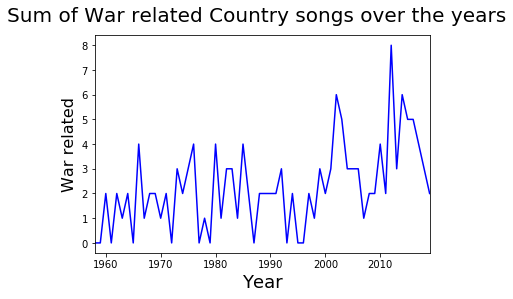

In [12]:
fig = plt.figure()

plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[0].keys()), \
         list(country_vals_by_year[0].values()), color='b')

fig.suptitle('Sum of War related Country songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related', fontsize=16)
plt.show()

When just looking at the number of songs defined as War related, we see that Country songs have been fairly consistently referencing War since 1958, with a spike in the mid-1970s, correlating to the Vietnam war period, a spike in the early 2000s, correlating to the start of the Iraq war, and more recent spikes since 2010, which correlates to the current military action occurring in the Middle East.

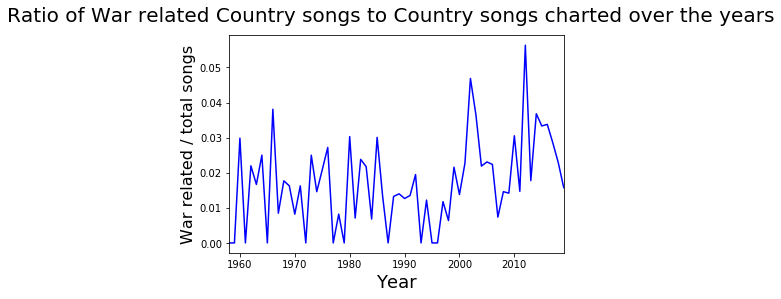

In [13]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[1].keys()), \
         list(country_vals_by_year[1].values()), color='b')
fig.suptitle(\
    'Ratio of War related Country songs to Country songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related / total songs', fontsize=16)
plt.show()

Once the total number of songs from the year is taken into account though, we see that Country songs have been fairly inconsistent about their references to War, with the peaks from the last chart still visible, but now accompanied by peaks in the 1960s and 1980s, which are harded to correlate to military action.

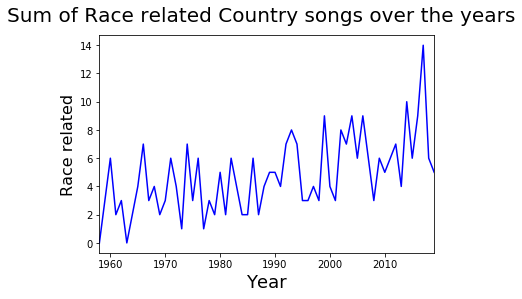

In [14]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[2].keys()),\
         list(country_vals_by_year[2].values()), color='b')
fig.suptitle(\
         'Sum of Race related Country songs over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related', fontsize=16)
plt.show()

When just looking at the number of songs defined as Race related, we see that Country songs have been gradually increasing their references to Race since 1958, with a spike in recent years which may be related to political events.

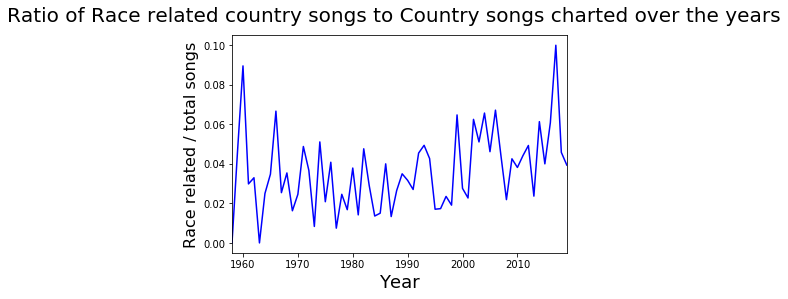

In [15]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[3].keys()), \
         list(country_vals_by_year[3].values()), color='b')
fig.suptitle(\
         'Ratio of Race related country songs to Country songs charted over the years', \
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related / total songs', fontsize=16)
plt.show()

Once the total number of songs from the year is taken into account though, we see that Country songs have been fairly consistent about their references to Race, with peaks at either end and generally moderate fluctuation in between, indicating that race is likely not a topic that influences Country music.

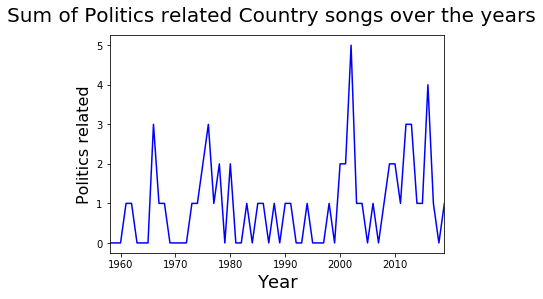

In [16]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[4].keys()), \
         list(country_vals_by_year[4].values()), color='b')
fig.suptitle(\
         'Sum of Politics related Country songs over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related', fontsize=16)
plt.show()

When just looking at the number of songs defined as Politics related, it is hard to identify any trend in country music relating to politics, other than peaks correlating to the time of the Vietnam War, Iraq War, and recent election, all of which had impacts on people's political beliefs.

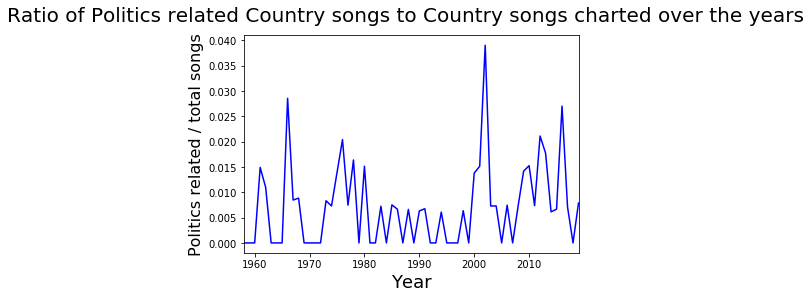

In [17]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[5].keys()), \
         list(country_vals_by_year[5].values()), color='b')
fig.suptitle(\
    'Ratio of Politics related Country songs to Country songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related / total songs', fontsize=16)
plt.show()

When the total number of songs from the year is taken into account, it really doesn't clear up the data at all, so it is hard to say how much country music directly correlates to political events.

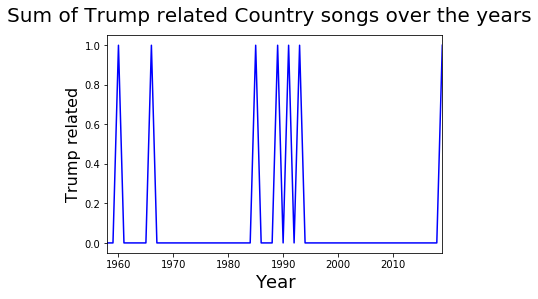

In [18]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[6].keys()),\
         list(country_vals_by_year[6].values()), color='b')
fig.suptitle('Sum of Trump related Country songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related', fontsize=16)
plt.show()

When just looking at the number of songs defined as Trump related, we can only see a single peak occuring this year, indicating that exactly one song this year was about President Trump or his politics, the peaks from years prior to 1990 are most likely false positives, and the ones during the 1990s are likely just referencing him as a publicly known figure.

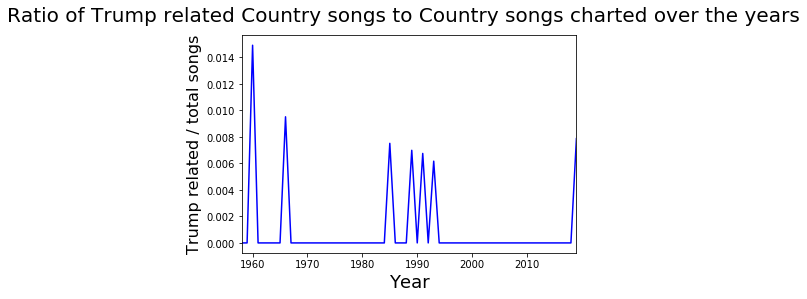

In [19]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(country_vals_by_year[7].keys()), \
         list(country_vals_by_year[7].values()), color='b')
fig.suptitle(\
        'Ratio of Trump related Country songs to Country songs charted over the years', \
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related / total songs', fontsize=16)
plt.show()

Once the total number of songs from the year is taken into account though, we see that even though the year is only halfway through, the number of songs not referencing Donald Trump dwarfs the single song that is referencing him to less than a single percent of the songs charted.

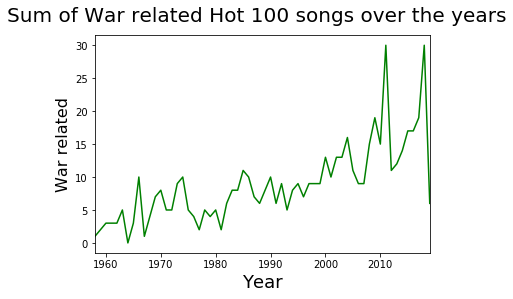

In [20]:
fig = plt.figure()

plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[0].keys()), \
         list(hot_vals_by_year[0].values()), color='g')

fig.suptitle('Sum of War related Hot 100 songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related', fontsize=16)
plt.show()

The number of war related songs in the hot 100 songs chart has a positive increasing trend from 1958 to 2019. The line chart shows a gentle increase from 1960s to 2010s, and a peak in the recent years. The range of the sum of war-related mentions per year goes from 0 to greater than 140. *number of war-related mentions per year

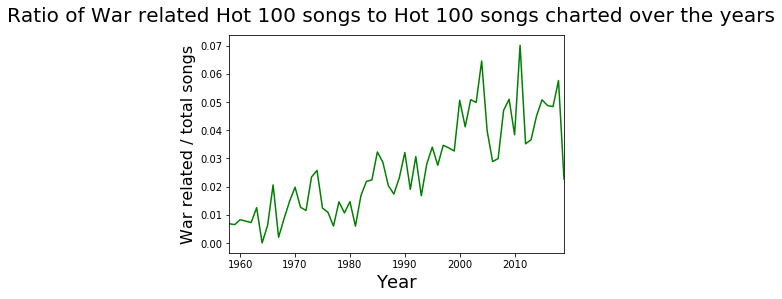

In [21]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[1].keys()), \
         list(hot_vals_by_year[1].values()), color='g')
fig.suptitle(\
        'Ratio of War related Hot 100 songs to Hot 100 songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related / total songs', fontsize=16)
plt.show()

This graph shows a consistent trend with the above graph that the ratio of war-related songs on the hot 100 chart is increasing over the decades with a peak in the recent years.

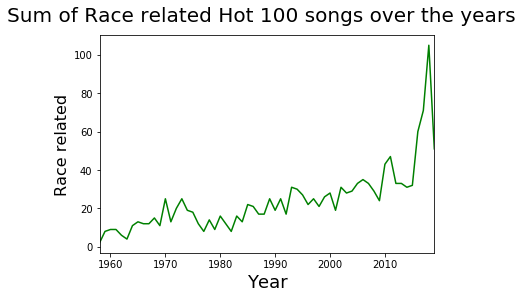

In [22]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[2].keys()),\
         list(hot_vals_by_year[2].values()), color='g')
fig.suptitle('Sum of Race related Hot 100 songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related', fontsize=16)
plt.show()

The number of race-related songs on chart is showing a similar positive trend over the years. The trend starts from less than 10 race-related songs in 1960 increased to around 100 race-related songs after 2015.

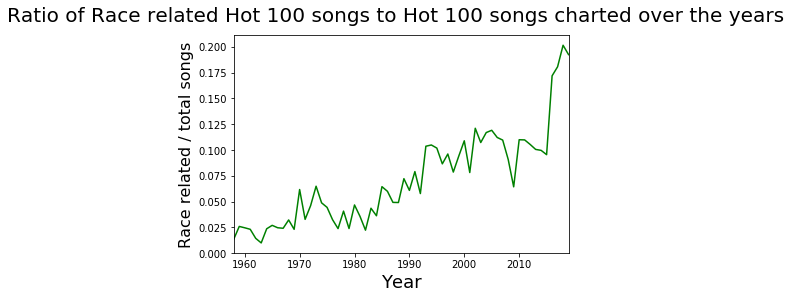

In [23]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[3].keys()), \
         list(hot_vals_by_year[3].values()), color='g')
fig.suptitle(\
        'Ratio of Race related Hot 100 songs to Hot 100 songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related / total songs', fontsize=16)
plt.show()

The ratio of race-related songs in the hot 100 chart also shows a positive increasing trend, with a peak reaching 20% around 2018. The ratio started to increase more rapidly around 1990s.

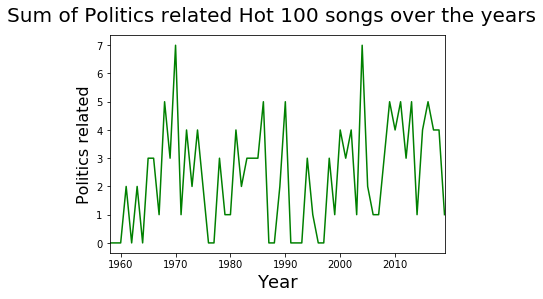

In [24]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[4].keys()),\
         list(hot_vals_by_year[4].values()), color='g')
fig.suptitle('Sum of Politics related Hot 100 songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related', fontsize=16)
plt.show()

The sum of politics-related songs on the chart ranges from 0 to 8. The trend peaks around 1970 and 2010, but generally shows a consistent trend over the years.

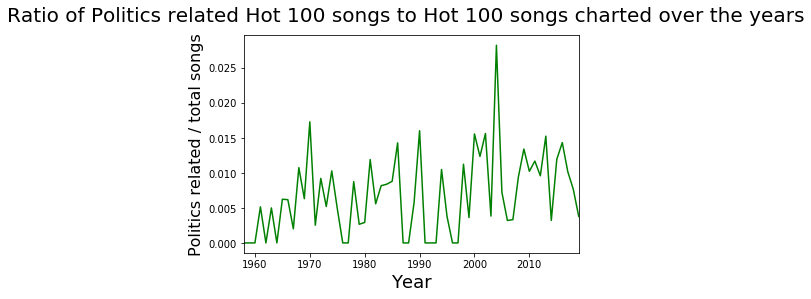

In [25]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[5].keys()), \
         list(hot_vals_by_year[5].values()), color='g')
fig.suptitle(\
        'Ratio of Politics related Hot 100 songs to Hot 100 songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related / total songs', fontsize=16)
plt.show()

The ratio of politics-related songs on chart shows a relatively flat trend, but there is a peak around 2003 with a 0.03 ratio of politics-related mentions over the 100 hot songs on chart.

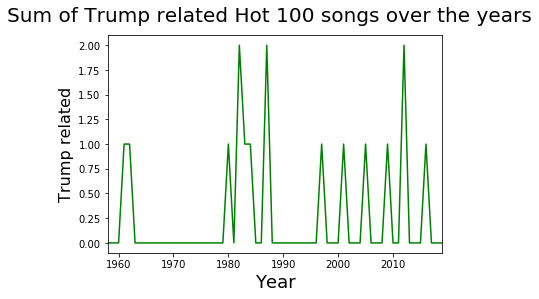

In [26]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[6].keys()),\
         list(hot_vals_by_year[6].values()), color='g')
fig.suptitle('Sum of Trump related Hot 100 songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related', fontsize=16)
plt.show()

The number of Trump-related mentions is relatively low ranging from 0 to 2 mentions per year on the hot 100 chart. The peaks occured around 1982, 1988, and 2012.

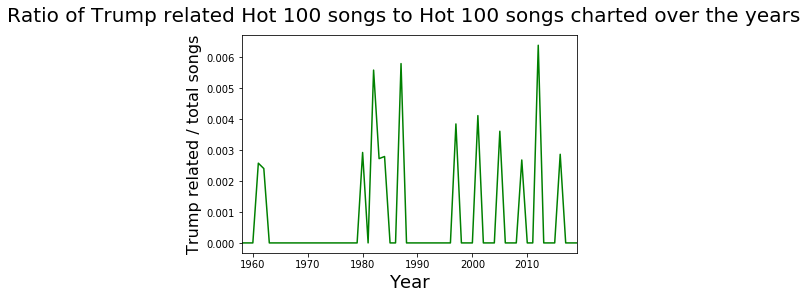

In [27]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hot_vals_by_year[7].keys()), \
         list(hot_vals_by_year[7].values()), color='g')
fig.suptitle(\
        'Ratio of Trump related Hot 100 songs to Hot 100 songs charted over the years',\
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related / total songs', fontsize=16)
plt.show()

When taking the total number of songs into accound, the chart shows a consistent trend with the chart above.

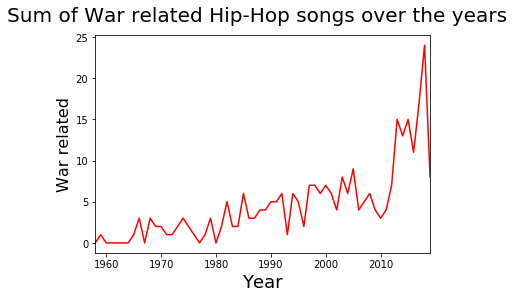

In [28]:
fig = plt.figure()

plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[0].keys()),\
         list(hip_vals_by_year[0].values()), color='r')

fig.suptitle('Sum of War related Hip-Hop songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related', fontsize=16)
plt.show()

We can see a huge spike on 2018 on war related hip-hop songs and then drops down on 2019. The reason
why the drop happened from 2018 to 2019 is because we are still halfway to the end of 2019 and the data on
2019 is still incomplete. Another thing that we can observe is the increase from 2017 to 2018. Currently
there are no apparent reasons why this is the case just by looking at the numbers. Our initial thought was
that Iraq war still have its effect until 2018, but we put that thought on hold until we found more evidence
on it.

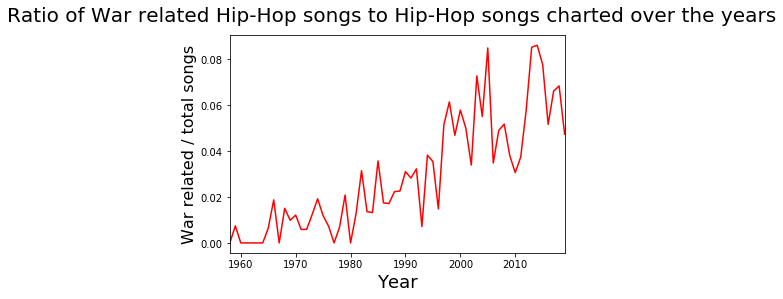

In [29]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[1].keys()), \
         list(hip_vals_by_year[1].values()), color='r')
fig.suptitle(\
        'Ratio of War related Hip-Hop songs to Hip-Hop songs charted over the years', \
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related / total songs', fontsize=16)
plt.show()

We can observe a slow but steady increase throughout the year 1960 to 1994. In 1995 we see a huge spike in
the songs that have war related words in its lyrics. The only war related events on 1995 are the following:

1. The Oklahoma City Bombing (April 19)
2. White House Memo on Affirmative Action
3. President Bill Clinton Confirms Area 51 Exists source: [link](http://www.inthe90s.com/generated/time1995.shtml)

Those war related events might affect the sudden spike on 1995. Then on 2015-2016 was the time where Trump
started campaigning for presidency so that may explain the spike on that area too. However, we should also
consider the changes in the music itself, artists may actually change their style of songs. For example,
we can see the difference between early Taylor Swift songs(country) with her current ones (more like pop songs)

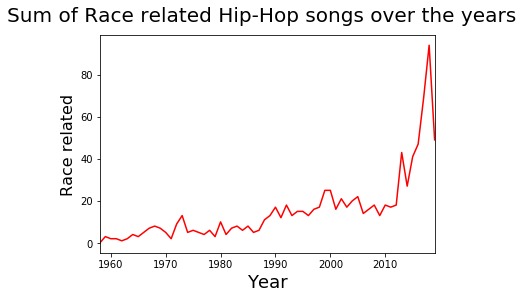

In [30]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[2].keys()), \
         list(hip_vals_by_year[2].values()), color='r')
fig.suptitle('Sum of Race related Hip-Hop songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related', fontsize=16)
plt.show()

Here we also see that there is a spike in 2018. So right now, we know that 2018 has many
songs that both have war related songs and race related songs. Our original assumption (more
war-related songs) is a little bit off target. There is more possibility that it just changed
because of cultural shift happening in the music industry.

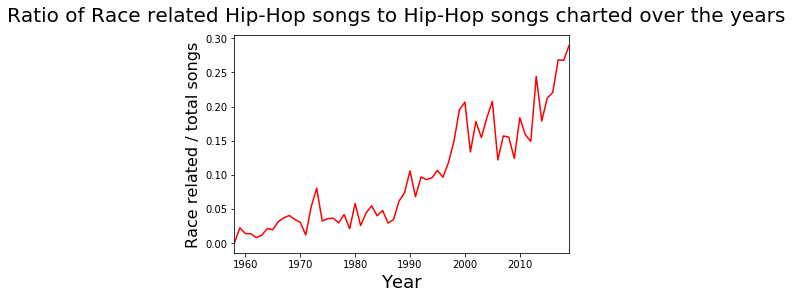

In [31]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[3].keys()), \
         list(hip_vals_by_year[3].values()), color='r')
fig.suptitle(\
        'Ratio of Race related Hip-Hop songs to Hip-Hop songs charted over the years', \
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related / total songs', fontsize=16)
plt.show()

Our previous analysis still stands here. However, there is a spike in 1995 that did not show
up in the previous graph. This may have something to do with artist's response toward a number
political or racial event on 1995, though it is more likely that it is just the cultural shift
in the music industry

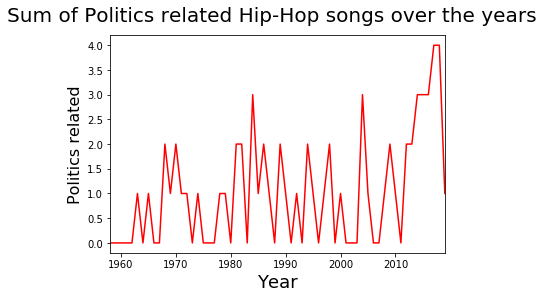

In [32]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[4].keys()), \
         list(hip_vals_by_year[4].values()), color='r')
fig.suptitle('Sum of Politics related Hip-Hop songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related', fontsize=16)
plt.show()

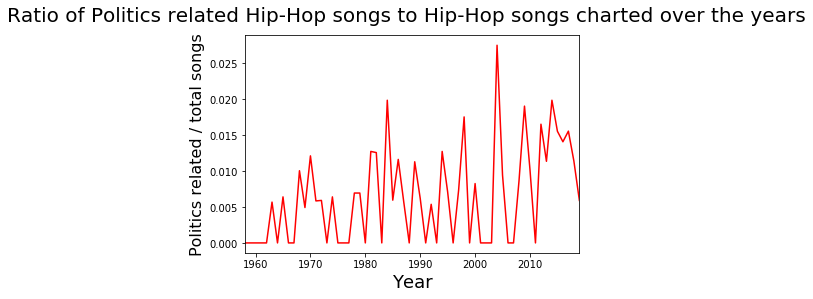

In [33]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[5].keys()), \
         list(hip_vals_by_year[5].values()), color='r')
fig.suptitle(\
        'Ratio of Politics related Hip-Hop songs to Hip-Hop songs charted over the years', \
             fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related / total songs', fontsize=16)
plt.show()

#### For Sum and Ratio of Politics related songs:
We can see a really small percentage of songs (below 10 songs) that actually counts as politically related
songs. Political words can be really specific words that may not be used in songs, so we ended up only
having a very small list of words that can categorize a song to be politically related. Therefore, it may
have affected the current Hip-Hop graphs to show such low percentage.

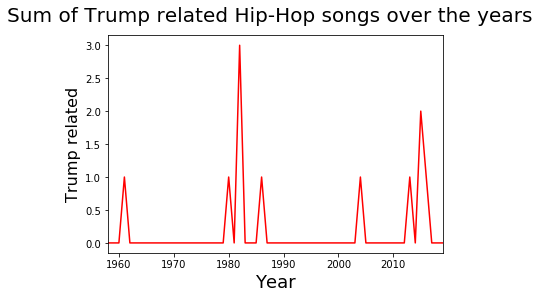

In [34]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[6].keys()), \
         list(hip_vals_by_year[6].values()), color='r')
fig.suptitle('Sum of Trump related Hip-Hop songs over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related', fontsize=16)
plt.show()

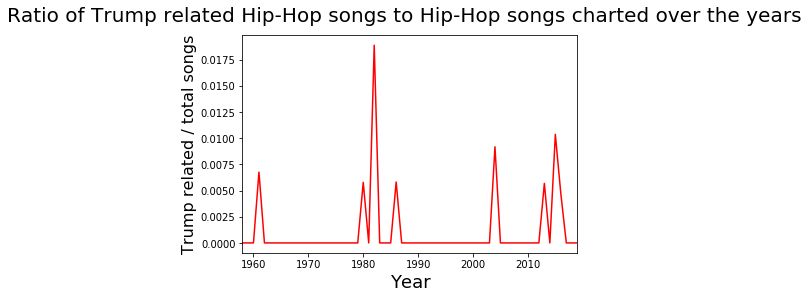

In [35]:
fig = plt.figure()
plt.xlim(1958,2019)
plt.plot(list(hip_vals_by_year[7].keys()), \
         list(hip_vals_by_year[7].values()), color='r')
fig.suptitle('Ratio of Trump related Hip-Hop songs to Hip-Hop songs charted over the years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related / total songs', fontsize=16)
plt.show()

#### For Sum and Ratio of Trump related songs:
There are even smaller set of words that can categorize a song to be Trump related. However, it is
interesting how trump related words appear in lyrics under the year 1990 when in those years, Trump
is not as controversial as he is now. In addition, words like "the wall" and "red hat" is more likely
to be in that range than

## Year based analysis

The initial idea of grouping based on year is to see how does politics impact the songs released that year.  
We did this by checking for political terms within the lyrics of each song for the year, and if the total number of occurences for the political words was greater than our threshold, we counted that song as political. <br>
We then determined the ratio of political songs to total songs charted for the year, which produced more reliable results as the number of songs per year was inconsistent for both the Country and Hip-Hop charts, which originally included 30 songs per week but switched to 50 songs per week later. <br>
As we can see, there are several instances where the number of songs including political references seems to rapidly increase at a point in time, but when the total number of songs charted is taken into account, the peak is far less impressive. <br>
These plots are hard to compare though, so lets put the ratios together.

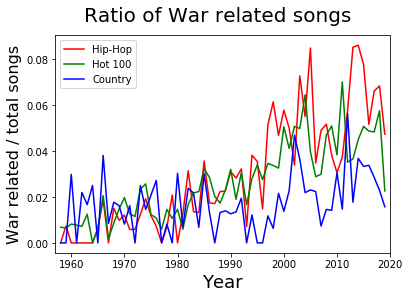

In [36]:
fig = plt.figure()
plt.xlim(1957,2020)
plt.plot(list(hip_vals_by_year[1].keys()), \
         list(hip_vals_by_year[1].values()), color='r', label="Hip-Hop")
plt.plot(list(hot_vals_by_year[1].keys()), \
         list(hot_vals_by_year[1].values()), color='g', label="Hot 100")
plt.plot(list(country_vals_by_year[1].keys()), \
         list(country_vals_by_year[1].values()), color='b', label="Country")
plt.legend(loc="upper left")
fig.suptitle('Ratio of War related songs', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('War related / total songs', fontsize=16)
plt.show()

The data actually shows a relatively low amount of war related songs in the 1958-1975 period that the Vietnam War occurred in, showing a much stronger impact as time went on. This supports the idea that we inaccurately remember the Vietnam War era as a time of protest/political songs. The data also shows a strong usage of war diction used in Hip Hop songs from around 1995-2019, which is likely unrelated to actual war.

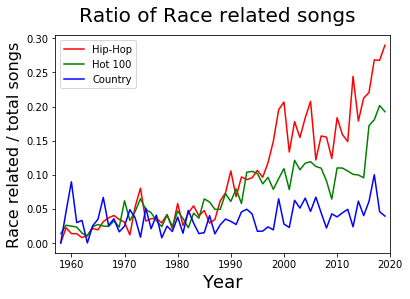

In [37]:
fig = plt.figure()
plt.xlim(1957,2020)
plt.plot(list(hip_vals_by_year[3].keys()), \
         list(hip_vals_by_year[3].values()), color='r', label="Hip-Hop")
plt.plot(list(hot_vals_by_year[3].keys()), \
         list(hot_vals_by_year[3].values()), color='g', label="Hot 100")
plt.plot(list(country_vals_by_year[3].keys()), \
         list(country_vals_by_year[3].values()), color='b', label="Country")
plt.legend(loc="upper left")
fig.suptitle('Ratio of Race related songs', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Race related / total songs', fontsize=16)
plt.show()

The data definitely suggests that race has become a more prominent subject matter in recent years, spiking in the Hot 100 at around 2015 (when Donald Trump began campaigning). While race has been a topic in Hip-Hop music for years, we see a similar upward trend in the 2010s. We also see that country music doesn't discuss race at all, the subject accounting for only ~10% maximum of the total songs in comparison to Hip-Hop's ~25% and Hot 100's ~20%. This suggests that country music is less politically charged than Hip-Hop and the Hot 100.

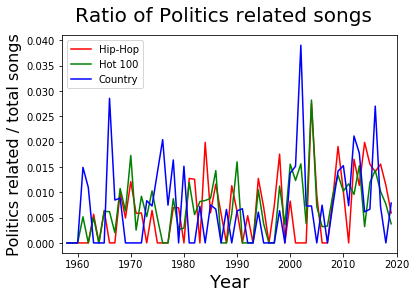

In [38]:
fig = plt.figure()
plt.xlim(1957,2020)
plt.plot(list(hip_vals_by_year[5].keys()), \
         list(hip_vals_by_year[5].values()), color='r', label="Hip-Hop")
plt.plot(list(hot_vals_by_year[5].keys()), \
         list(hot_vals_by_year[5].values()), color='g', label="Hot 100")
plt.plot(list(country_vals_by_year[5].keys()), \
         list(country_vals_by_year[5].values()), color='b', label="Country")
plt.legend(loc="upper left")
fig.suptitle('Ratio of Politics related songs', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Politics related / total songs', fontsize=16)
plt.show()

While the data shows peaks in the late 70 and 80s, as well as early 2000 and 2015, the results seem to be largely inconclusive. This can be because our definition of "politics" isn't concise enough, that we don't have enough data, or that political songs more often mention core issues like race rather than general political terms.

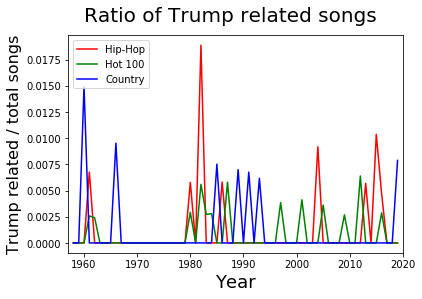

In [39]:
fig = plt.figure()
plt.xlim(1957,2020)
plt.plot(list(hip_vals_by_year[7].keys()), \
         list(hip_vals_by_year[7].values()), color='r', label="Hip-Hop")
plt.plot(list(hot_vals_by_year[7].keys()), \
         list(hot_vals_by_year[7].values()), color='g', label="Hot 100")
plt.plot(list(country_vals_by_year[7].keys()), \
         list(country_vals_by_year[7].values()), color='b', label="Country")
plt.legend(loc="upper left")
fig.suptitle('Ratio of Trump related songs', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Trump related / total songs', fontsize=16)
plt.show()

The data here, similar to politics, has a good amount of interference and is largely inconclusive. While references to Trump might make sense in the 1990s, the 2000s, and the 2010s due to his cultural icon status, references prior to those dates are likely not actually referencing him or his policies.

## Ratios Compared

When we look at the ratios for our datasets layered over each other, our data indicates a gradual increase in politicism of music in relation to War and Race issues from all three charts since 1958, although it is possible we are getting a great deal of false positives due to how general the words we are searching for are, and the number of overlapping terms we use. However the ratios for songs related to politics in the governmental sense are incredibly eratic, but seem to have similar peaks in a few years. The ratios for Trump seem inconsistent as well, which is likely indicative of a high number of false positives coming from our word set.

# Ethics & Privacy

&emsp;&emsp;Since we are going to focus our attention to music and politics, most of our data will be available publicly and less likely to have any privacy issues.<br>
&emsp;&emsp;Most of our ethical considerations revolves around the community and political figures itself. We live in an era where social construct is a huge thing we cannot ignore. This includes race, gender, and sexual orientations. We have to be careful about the possible race discrimination that may be revealed in the data that we collected. One way to mitigate this is by evaluating the data source and look for race discrimination before using the data. This method can also be used to mitigate any gender discrimination. For sexual orientation, the data is not given from the dataset, although we can find the sexual orientation of the musician, and that is a very complicated and exhaustive work to find sexual orientation of an artist. Furthermore, there are thousands of songs with thousands of different writers and musicians.<br>
&emsp;&emsp;Since we analyze artist’s response toward political activity around them, we have to be careful not proposing conclusions that may endanger the artist’s career or life. Likewise, political figures should also be protected. This can be solved by anonymizing any entity (artists or public figures) that we will analyze. This does two-fold: protecting artist’s and public figure’s identity, and push the research to a more generalized political and musical scope.<br>

# Conclusion & Discussion

Based on our earlier analysis, it would seem that our initial hypothesis was wildly incorrect: popular music has gotten much more political since the time of the Vietnam War, and the music that was popular during that time wasn't particularly political to begin with. <br>

When we checked our dataset for the occurence of words related to War, we found that references had been steadily increasing since the 1960s in all the charts, but we should acknowledge that this is not an entirely accurate method of testing for political nature, and there are other possible explanations for the appearance of words relating to War. It is fairly common knowledge that American pop culture has gotten increasingly violent over the past century, so it is entirely possible these songs are just including violent phrases as metaphors, but our word-searching method cannot detect sentiment, so it assumes them to be political references. <br>

When we checked our dataset for the occurence of words related to Race, we saw a similar trend to that of the data for War, but again, there are other possible causes for it. African American musicians are far more successful today then they were during the 1960s, and it is possible this is just indicative of a greater number of African American artists writing about their own experiences and the cultures they come from, which could be misinterpretted by our methods as carrying political sentiment. <br>

When we checked our dataset for the occurence of words related to Politics (in the sense of government, law and the like), we saw an eratic series of peaks and drops for all of the charts, not clearly indicating any increase or decrease in references, this is likely due to the fact that most political songs will make references to the beliefs of the artists that charge their political action rather than explicitly describe political actions. <br>

And lastly, when we checked our dataset for the occurence of words related to Trump, we saw an inconsistent series of peaks, many of which occurred before Donald Trump was even a public figure, this is likely indicative that out "Trump related words" set is too broad or includes terms that had another meaning before Trump became associated with them. Knowing this, it is hard to definitively declare that the more recent songs related to Trump are even actually referencing him and not just showing up as false positives, so that data was inconclusive.

Overall, our data might suggest that popular music has gotten more political in recent years, but we can hardly say our tests are definitive proof of that.